# introduction to machine learning
## pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Arman"
last_name= "Lotfalikhani"
student_number= "99109166"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
import os
abs_path=os.path.dirname(os.path.abspath('__file__'))+'/mnist.npz'
#Note: I was getting 403 errors, so I downloaded the mnist dataset manually from the specified link
#and used the current path of the file to load it manually
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=abs_path)

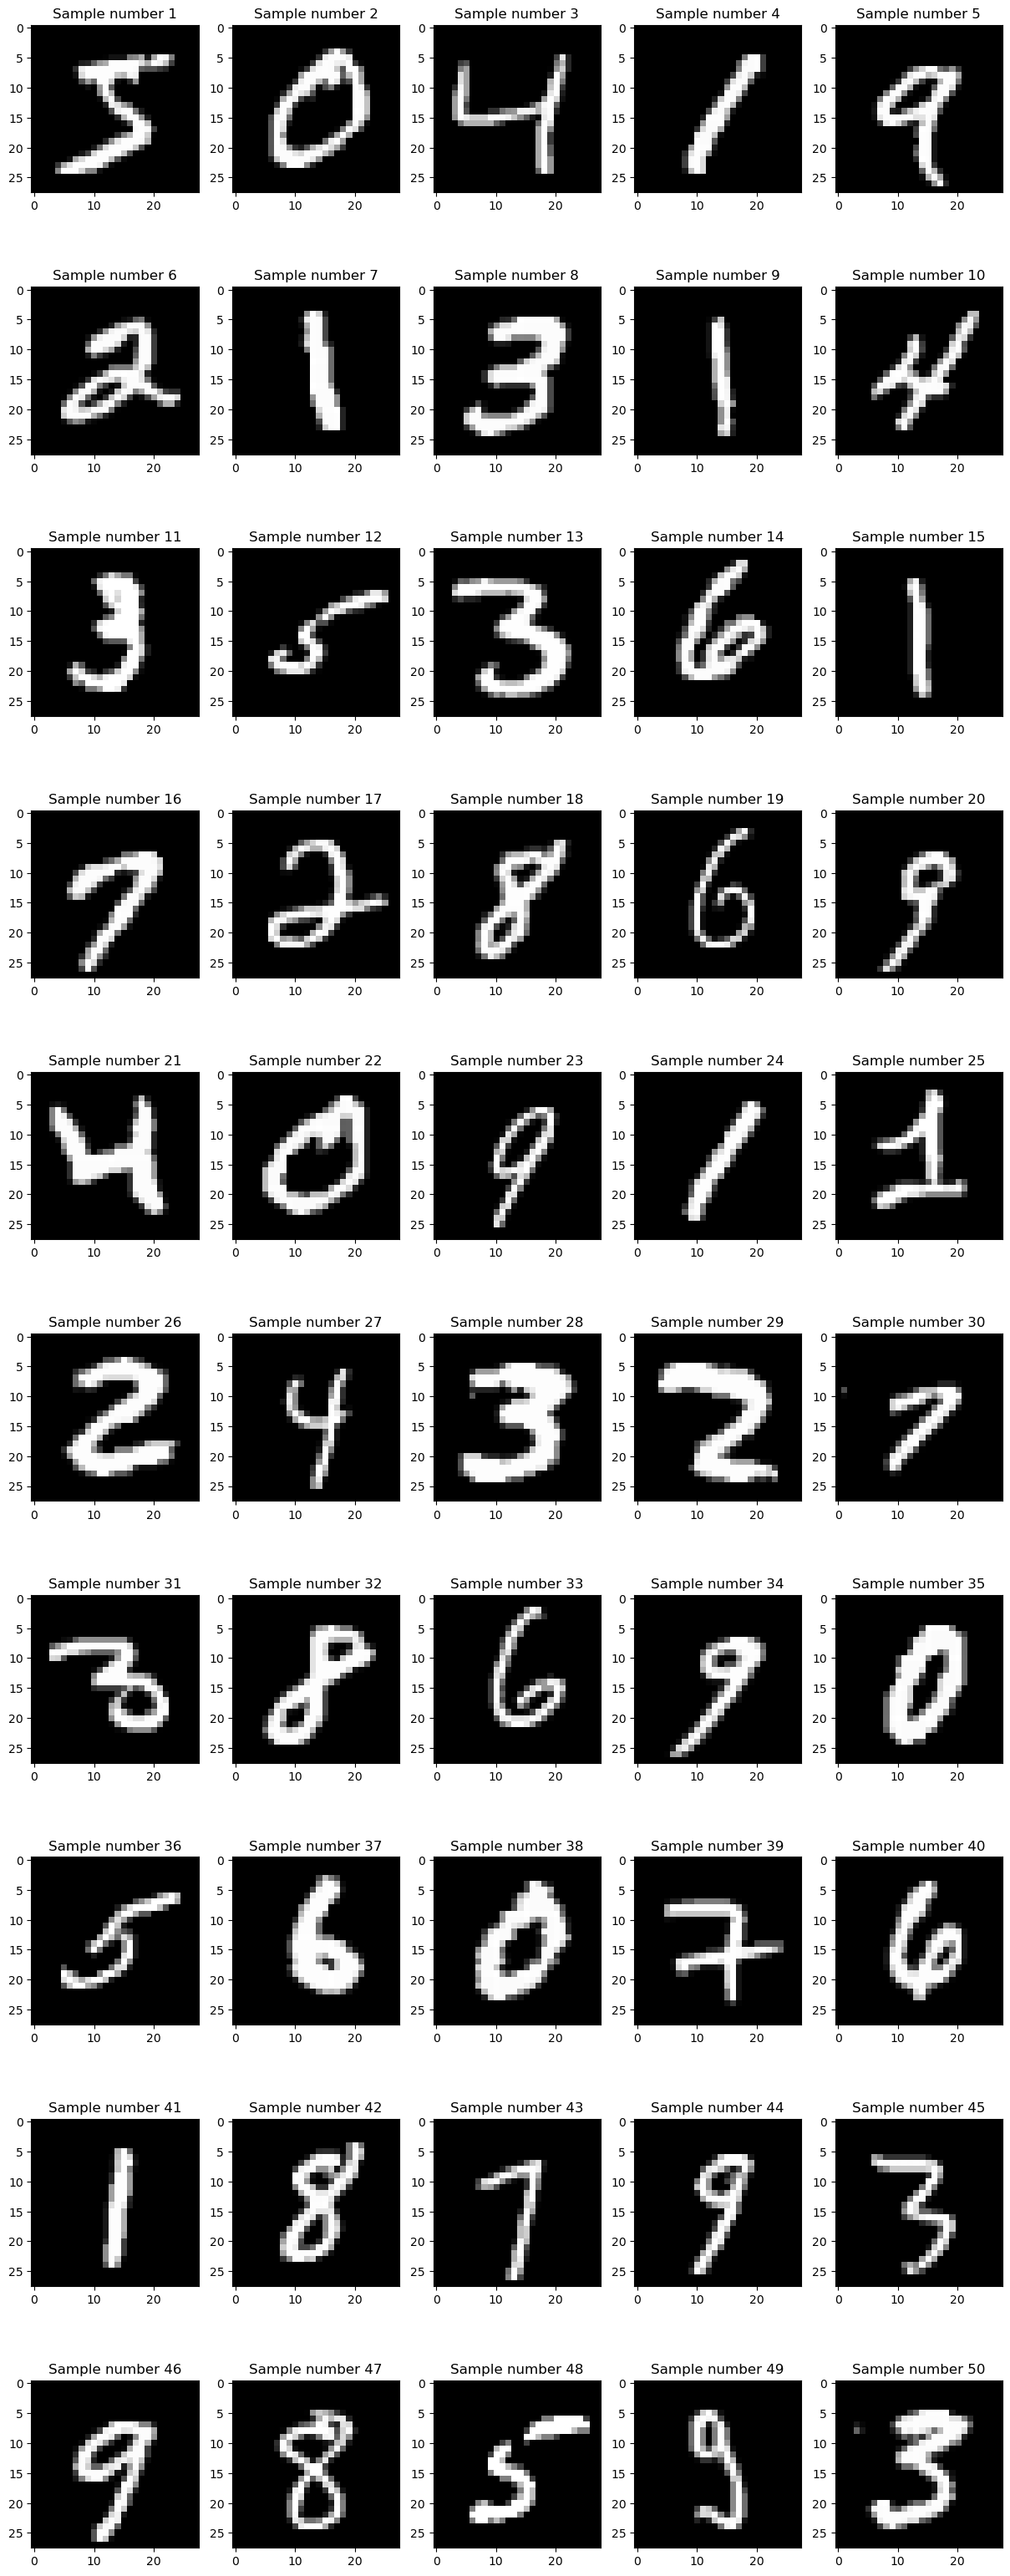

In [4]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
    l=num_images//5+(num_images%5 !=0) #Number of rows
    fig_height=l*4
    fig1,axs1=plt.subplots(l,5,figsize=(15,fig_height))
    rng=np.random.default_rng()
    for i in range(num_images):
        index = i#rng.integers(len(X))
        image = X[index]
        axs1[i//5][i%5].title.set_text("Sample number %i" %(i+1))
        axs1[i//5][i%5].imshow(image, cmap="gray")
    plt.show()
show_images(50,x_train)

In [4]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train_n=x_train/np.max(x_train)
x_test_n=x_test/np.max(x_test)
x_train_n=x_train_n.reshape(x_train_n.shape[0],x_train_n.shape[1]*x_train_n.shape[2])
x_test_n=x_test_n.reshape(x_test_n.shape[0],x_test_n.shape[1]*x_test_n.shape[2])
print(np.max(x_test),np.max(x_train))
print(x_train_n.shape)
print(x_test_n.shape)

255 255
(60000, 784)
(10000, 784)


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [5]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
C_train=np.cov(x_train_n.T)
C_test=np.cov(x_test_n.T)
u1,s1,vh1=np.linalg.svd(C_train,compute_uv=True,hermitian=False)
u2,s2,vh2=np.linalg.svd(C_test,compute_uv=True,hermitian=False)
print(s1)
print(s2)

[5.11687301e+00 3.74139084e+00 3.25270845e+00 2.84162070e+00
 2.56711774e+00 2.27366339e+00 1.72515498e+00 1.52056024e+00
 1.45630525e+00 1.24275009e+00 1.11208951e+00 1.06664054e+00
 9.04680833e-01 8.92181223e-01 8.32353048e-01 7.81900323e-01
 6.98386871e-01 6.73255811e-01 6.25995240e-01 6.07763020e-01
 5.62145880e-01 5.30798829e-01 5.02780255e-01 4.81147033e-01
 4.65783200e-01 4.42538691e-01 4.28439606e-01 4.14618707e-01
 3.92667337e-01 3.64261791e-01 3.46985958e-01 3.41741890e-01
 3.17734284e-01 3.09280821e-01 3.00549034e-01 2.86632712e-01
 2.66680512e-01 2.57227909e-01 2.53838022e-01 2.49006738e-01
 2.40823990e-01 2.34543854e-01 2.20658652e-01 2.09962678e-01
 2.02981381e-01 1.97776690e-01 1.90872477e-01 1.85379715e-01
 1.79298798e-01 1.69711256e-01 1.68204657e-01 1.64929264e-01
 1.56059568e-01 1.52353954e-01 1.49810350e-01 1.43117013e-01
 1.42107650e-01 1.36282013e-01 1.33802866e-01 1.29062999e-01
 1.26809057e-01 1.26153552e-01 1.21484982e-01 1.16804842e-01
 1.12686254e-01 1.092614

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [6]:
explained_variance = 0.9 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
def appropriate_k(expected_variance,s):
    s_sum=0
    k=0
    while s_sum<expected_variance*np.sum(s):
        s_sum+=s[k]
        k+=1
    return k
#calculate the compression_ratio
k1=appropriate_k(explained_variance,s1)
k2=appropriate_k(explained_variance,s2)
print(k1,k2)

87 84


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

(87, 784)


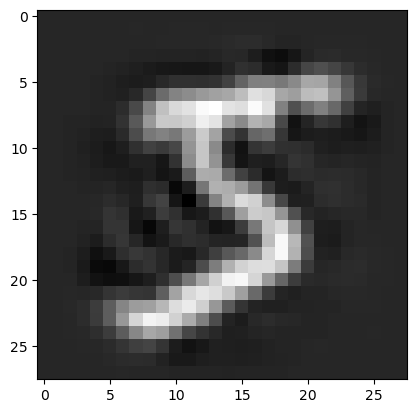

In [7]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image
F1=x_train_n@ vh1[:k1].T
X_k1=F1@vh1[:k1]
F2=x_test_n@ vh2[:k2].T
X_k2=F2@vh2[:k2]
y1=X_k1[0].reshape(28,28)*np.max(x_train)
#y2=(x_train_n[0]-x_train_n.mean(axis=0))@vh1[:k1].T@vh1[:k1]+x_train_n.mean(axis=0)
y2=(x_train_n[0])@vh1[:k1].T@vh1[:k1]
y2=y2.reshape(28,28)
plt.imshow(y2,cmap="gray")
plt.show()

It is clear that the image is reconstructed appropriately (The first sample can also be seen in the first plot of 50 images)

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [8]:
#complete below function using python PCA function
from sklearn.decomposition import PCA
def do_pca(n_components, data):
    #input number of component and not normalized data set.
    #output is the projected dataset
    pca=PCA(n_components)
    pca.fit(data)
    reduced=pca.transform(data)
    return reduced

In [9]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
from sklearn.svm import SVC
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    acc=np.sum(np.equal(y_pred,y_true))/len(y_pred)
    return acc

def ML_model_rbf(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    model=SVC(kernel='rbf',gamma='auto',max_iter=200)
    model.fit(X,y)
    y_pred=model.predict(X)
    acc=accuracy(y_pred,y)
    return acc

In [11]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
acc_list, pc_list = [], []
for pc in range (2,101):
    train_reduced=do_pca(pc,x_train_n)
    acc_list.append(ML_model_rbf(train_reduced,y_train,True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


KeyboardInterrupt: 

## Important: The above cell has no real errors, and only because of a long training time, the process was stopped manually. The values obtained up to that point we used for the plot and the best number of PCA components

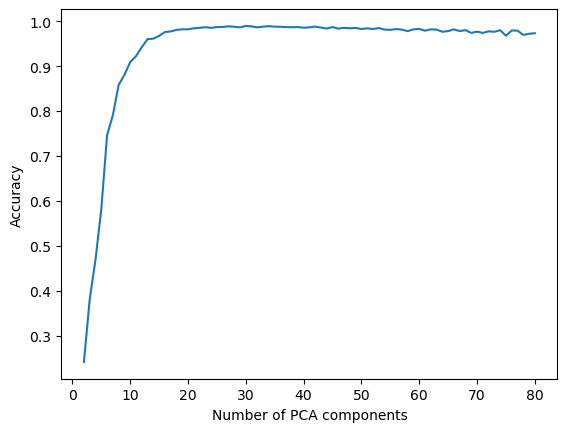

In [18]:
pc_list=np.arange(2,len(acc_list)+2,1)
plt.plot(pc_list,acc_list)
plt.xlabel('Number of PCA components')
plt.ylabel('Accuracy')
plt.show()

In [19]:
print(len(acc_list))
print(max(acc_list))
print(np.argmax(np.array(acc_list))+2)

79
0.9896333333333334
30


The number of components that maximizes the accuracy is 30. But as we see in the plot, the accuracy does not change a lot from after about 15 components, and it even decreases a little in the end, as a result of slight overfitting.
So the effective number of components is about 15.
